# Conecte o notebook Colab ao Google Drive

In [90]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
# Not Necessary cell
# List the content of your local computer folder
!ls -la "/content/gdrive/My Drive/darknet"

total 646856
drwx------ 3 root root      4096 Jan 13 20:03 bin
-rw------- 1 root root 662367552 Jan 13 18:46 cudnn-linux-x86_64-9.6.0.74_cuda12-archive.tar.xz
drwx------ 2 root root      4096 Jan 13 21:01 img
drwx------ 2 root root      4096 Jan 13 21:02 .ipynb_checkpoints


In [92]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [93]:
!tree /content/gdrive/My\ Drive/darknet/

/content/gdrive/My Drive/darknet/
├── bin
│   └── darknet
│       ├── 3rdparty
│       │   ├── pthreads
│       │   │   ├── bin
│       │   │   │   ├── pthreadGC2.dll
│       │   │   │   └── pthreadVC2.dll
│       │   │   ├── include
│       │   │   │   ├── pthread.h
│       │   │   │   ├── sched.h
│       │   │   │   └── semaphore.h
│       │   │   └── lib
│       │   │       ├── libpthreadGC2.a
│       │   │       └── pthreadVC2.lib
│       │   └── stb
│       │       └── include
│       │           ├── stb_image.h
│       │           └── stb_image_write.h
│       ├── appveyor.yml
│       ├── backup
│       ├── build
│       │   └── darknet
│       │       ├── darknet_no_gpu.sln
│       │       ├── darknet_no_gpu.vcxproj
│       │       ├── darknet.sln
│       │       ├── darknet.vcxproj
│       │       ├── x64
│       │       │   ├── backup
│       │       │   │   └── tmp.txt
│       │       │   ├── calc_anchors.cmd
│       │       │   ├── calc_mAP.cmd
│       │       │   ├── calc_m

# Verifique a versão de lançamento do CUDA

In [94]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


# Instale o cuDNN de acordo com a versão atual do CUDA

In [95]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xvf gdrive/My\ Drive/darknet/cudnn-linux-x86_64-9.6.0.74_cuda12-archive.tar.xz -C /usr/local/
!chmod a+r /usr/local/cuda/include

tar: gdrive/My Drive/darknet/cudnn-linux-x86_64-9.6.0.74_cuda12-archive.tar.xz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


# Clonando e compilando Darknet

In [96]:
#Importar opencv para que o comando !make funcione posteriormente
!pip install opencv-python
import cv2
print(cv2.__version__)

4.10.0


In [97]:
'''# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
!cp -r ./ /content/gdrive/My\ Drive/darknet/bin/darknet

# Set execution permissions to Darknet
!chmod +x ./darknet'''

'# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.\n# Comment this code on the future runs.\n!git clone https://github.com/kriyeng/darknet/ \n%cd darknet\n\n#Compile Darknet\n!make\n\n#Copies the Darknet compiled version to Google drive\n!cp -r ./ /content/gdrive/My\\ Drive/darknet/bin/darknet\n\n# Set execution permissions to Darknet\n!chmod +x ./darknet'

In [98]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive


# Makes a dir for darknet and move there
!mkdir darknet
%cd darknet


# Copy the Darkent compiled version to the VM local drive
!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet ./


# Set execution permissions to Darknet
!chmod +x ./darknet

mkdir: cannot create directory ‘darknet’: File exists
[Errno 20] Not a directory: 'darknet'
/content/darknet
cp: cannot overwrite non-directory './darknet' with directory '/content/gdrive/My Drive/darknet/bin/darknet'


# Alguns Utilitários

In [99]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

# Faça o download dos pesos de treinamentos da rede YOLO

In [100]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2025-01-13 22:20:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  19.6MB/s    in 13s     

2025-01-13 22:20:16 (17.8 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



# Testando a rede

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

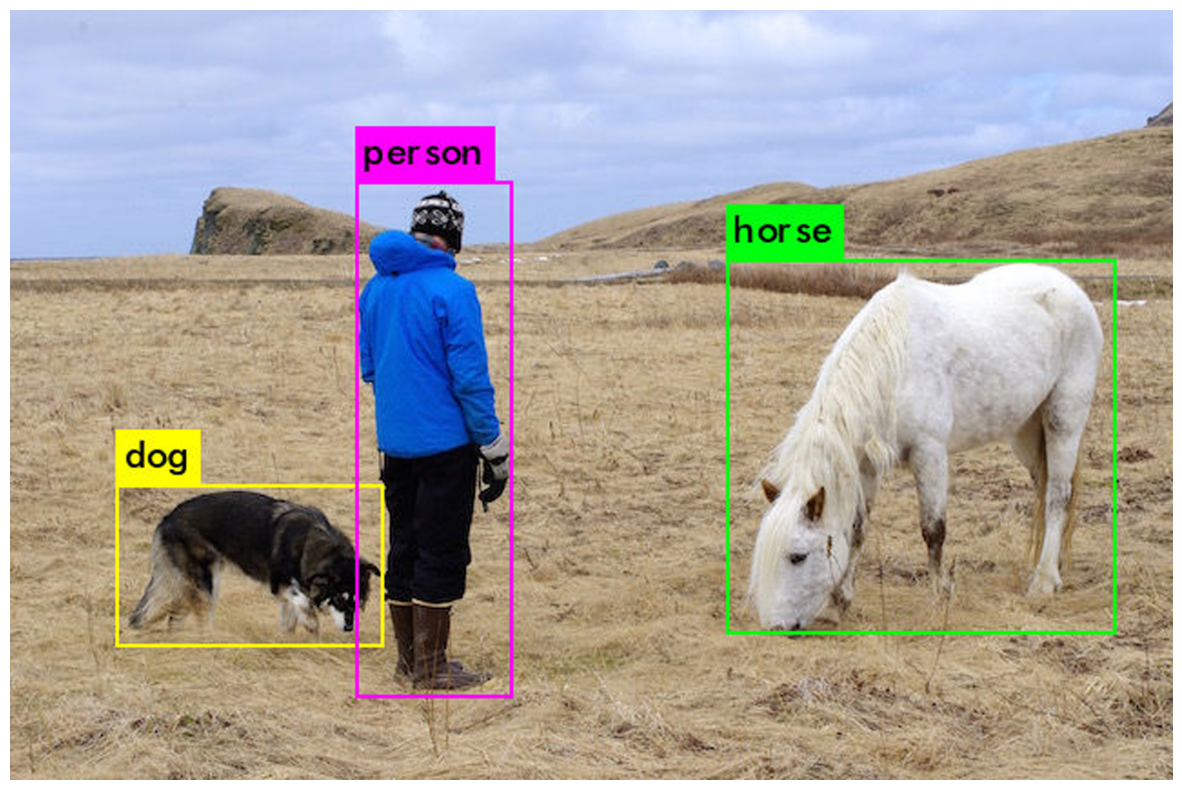

In [101]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

# Treinamento YOLO

In [105]:
# Copy fils from Google Drive to the VM local filesystem
#!cp -r "/content/gdrive/MyDrive/darknet/img/gato-e-cachorro-juntos.png" ./img

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

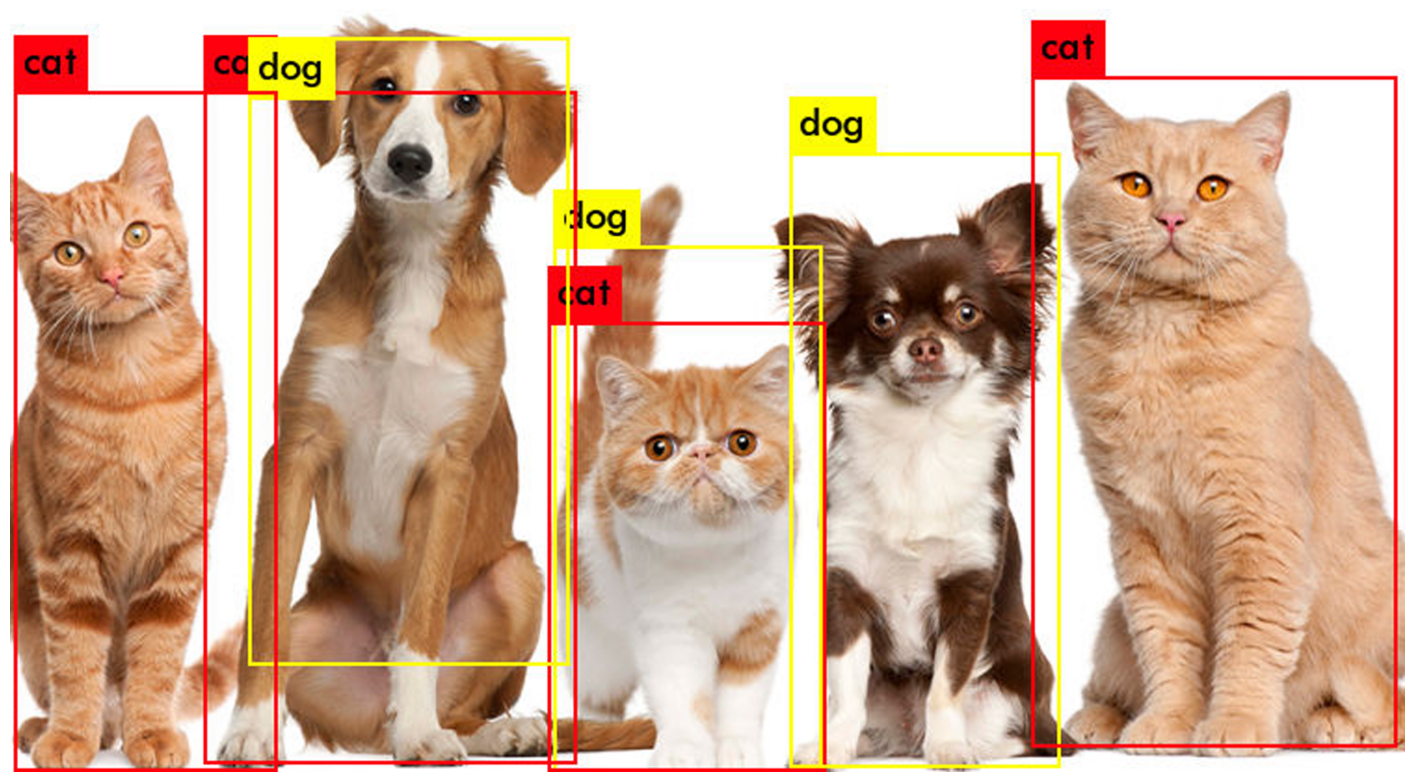

In [109]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detector test ./cfg/coco.data ./cfg/yolov3.cfg ./yolov3.weights
imShow('predictions.jpg')

